In [1]:
from sklearn import datasets
x,y = datasets.fetch_openml('mnist_784',version=1,return_X_y=True)  

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
x.head()    

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
x.shape

(70000, 784)

In [4]:
y.head()

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

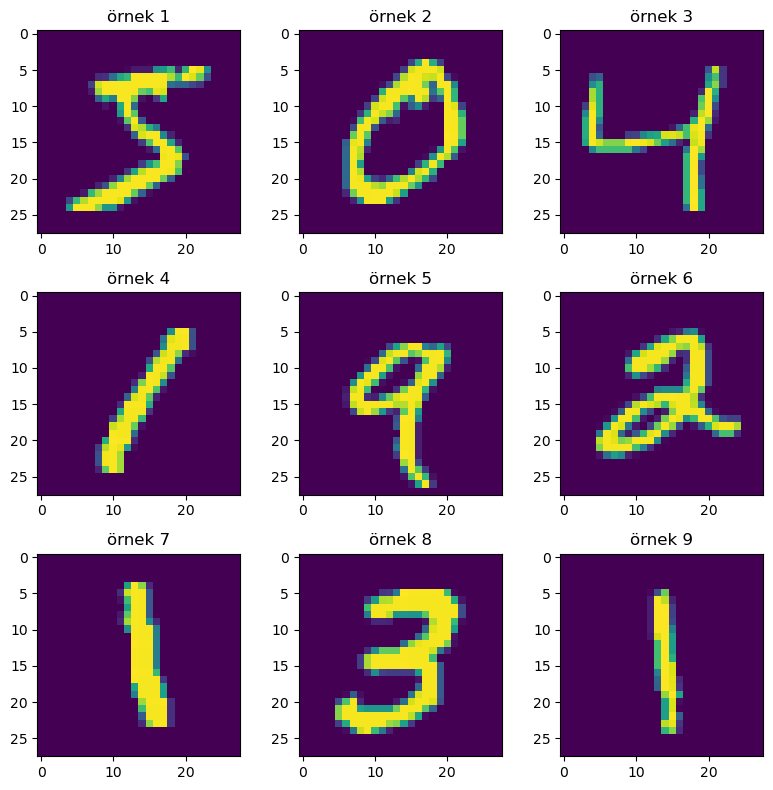

In [5]:
import matplotlib.pyplot as plt 
import numpy as np

fig ,axes = plt.subplots(nrows=3,ncols=3,figsize=(8,8))
for i,ax in enumerate(axes.flat):
    digit = x.iloc[i]
    digit_pixels = np.array(digit).reshape(28,28)   
    ax.imshow(digit_pixels)
    ax.set_title(f"örnek {i+1}")
plt.tight_layout()
plt.show()  

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [7]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train,y_train)

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [8]:
from sklearn.metrics import accuracy_score
y_pred = lr.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print(f"Modelin doğruluk oranı: {accuracy}")

Modelin doğruluk oranı: 0.9164285714285715


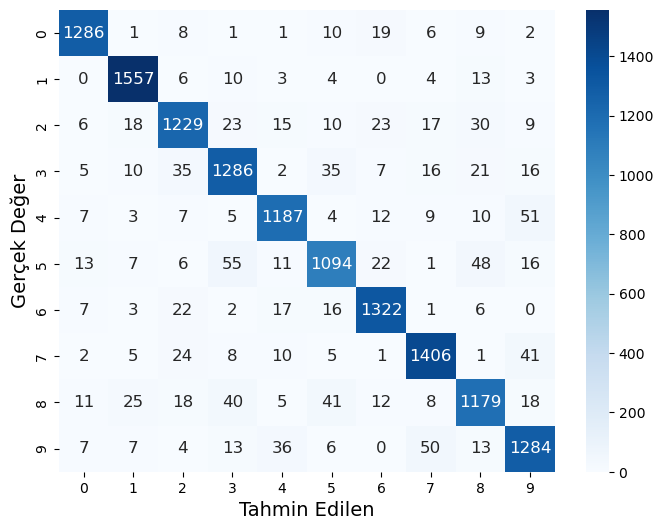

In [9]:
from sklearn.metrics import confusion_matrix # Hata matrisi oluşturmak için kullanılır
import seaborn as sns
cm = confusion_matrix(y_test,y_pred) # confusion_matrix() fonksiyonu gerçek ve tahmin edilen değerlerin karşılaştırılmasını sağlar
fig,ax = plt.subplots(figsize=(8,6))
sns.heatmap(cm,annot=True,ax=ax,cmap="Blues",fmt="d",annot_kws={"size":12})
ax.set_xlabel("Tahmin Edilen",fontsize=14)
ax.set_ylabel("Gerçek Değer",fontsize=14)
plt.show()

In [10]:
from PIL import Image # Resim işlemleri için kullanılır 
import numpy as np 
import matplotlib.pyplot as plt 

In [11]:
img = Image.open("resimler/6.png").convert("L") # Resmi siyah beyaz yapar / make the image black and white
img = img.resize((28,28))    # Resmi boyutlandırır / resize the image
img_array = np.array(img).reshape(1,-1) # Resmi numpy dizisine çevirir / convert the image to a numpy array

In [12]:
prediction = lr.predict(img_array)  
prediction 

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['6'], dtype=object)

Resimdeki rakam: 6


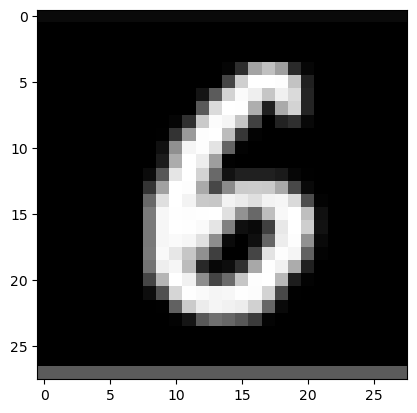

In [13]:
print(f"Resimdeki rakam: {prediction[0]}") # Resimdeki rakamı ekrana yazdırır / print the number in the image
plt.imshow(img,cmap="gray") # Resmi ekrana yazdırır / print the image

In [14]:
import pickle # Modeli kaydetmek ve yüklemek için kullanılır / used to save and load the model

In [15]:
with open("model.pkl","wb") as file:
    pickle.dump(lr,file) # modeli kaydettik / we saved the model

In [16]:
with open("model.pkl","rb") as file:
    loaded_model = pickle.load(file) # modeli yükledik / we loaded the model

In [17]:
loaded_model.predict(img_array) # modeli kullandık   / we used the model

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['6'], dtype=object)